<a href="https://colab.research.google.com/github/tseth92/NeuralNet_Square/blob/master/neural_network_square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''Training a neural network to predict the square of a number'''
import numpy as np
import matplotlib.pyplot as pp
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense
from IPython.display import Audio, display

Using TensorFlow backend.


In [0]:
'''configurations for neural net'''
# change these values to experiment
n_samples = 100000 # number of samples between 0 and mid_range
epochs = 400
batch_size = 1000
mid_range = 10 # range within which data is required

In [0]:
'''creates random samples of n_samples rows which are between 0 to 1.
mid_range decides the range under which the samples will be created.'''
def get_data(n_samples, mid_range):
  X = np.random.random((n_samples,1))*mid_range-(mid_range/2)
  # eg. if n_samples = 10000, mid_range = 10 then it will create samples b/w 
  # 0 and 5 positive and negative
  y = X*X
  #print(X)
  return X,y

In [0]:
''' creating the neural net model of 1:20:1; relu activation, mse as loss and 
adam optimizer'''
def get_model():
  model = Sequential()
  model.add(Dense(20, input_shape=(1,), activation='relu'))
  model.add(Dense(1))
  print(model.summary())
  model.compile(loss='mse', optimizer='adam')
  return model
  

In [0]:
''' train the model for specified number of epochs, batch_size'''
def train_model(X, y, model, epochs, batch_size):
  h = model.fit(X, y, validation_split=0.2,
               epochs=epochs,
               batch_size=batch_size,
               verbose=1)
  pp.figure(figsize=(15,2.5))
  pp.plot(h.history['loss'])
  return model

In [0]:
''' predict the model for X(training data) and or X2 which is outside 
the training dataset'''
def predict_model():
  pred = model.predict(X)
  mid_range = 20
  X2 = np.random.random((n_samples,1))*mid_range-(mid_range/2)
  pred2 = model.predict(X2)
  
  # uncomment below code to observe the expected and actual values
  # in the form (inputData, expectedOutputData, predictedOutputData, difference)
  
  #pred2 = model.predict([-6])
  #for i,j in zip(X, pred):
  #  print(i,i*i,j, j-(i*i))
  pp.figure(figsize=(10,3))
  pp.plot(X,pred, '.')
  pp.xlabel('x')
  pp.ylabel('prediction')
  pp.title('Prediction within training sample space')
  
  pp.figure(figsize=(10,3))
  pp.plot(X2,pred2, '.')
  pp.xlabel('x')
  pp.ylabel('prediction')
  pp.title('Prediction outside training sample space')

[[-1.44533664]
 [ 4.61046119]
 [ 2.75342251]
 ...
 [-3.99217972]
 [ 1.52644569]
 [-1.6185863 ]]



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None



Train on 80000 samples, validate on 20000 samples
Epoch 1/400
80000/80000 [==============================] - 1s 15us/step - loss: 110.2037 - val_loss: 96.7056
Epoch 2/400
80000/80000 [==============================] - 0s 5us/step - loss: 83.0902 - val_loss: 71.1072
Epoch 3/400
80000/80000 [==============================] - 0s 4us/step - loss: 59.7552 - val_loss: 50.1704
Epoch 4/400
80000/80000 [===============

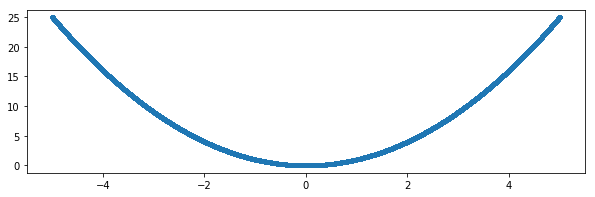

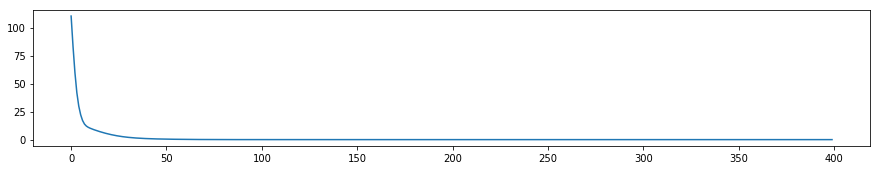

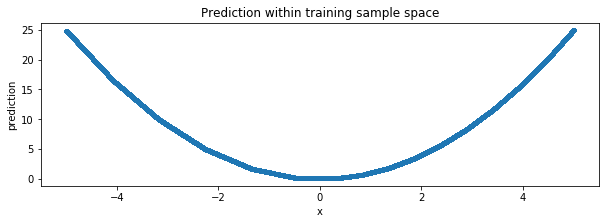

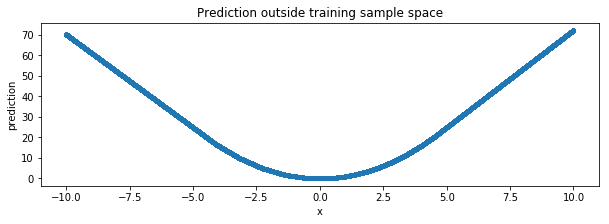

In [8]:
if __name__ == '__main__' :
  X,y = get_data(n_samples, mid_range)
  model = get_model()
  pp.figure(figsize=(10,3))
  pp.plot(X,y,'.')
  model = train_model(X, y, model, epochs, batch_size)
  predict_model()
  # below is audio which will fireup(literally :D) when the training and 
  #prediction completes
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/ \
                original/woo_vu_luvub_dub_dub.wav', autoplay=True))